## Import data and modify

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()
import matplotlib.ticker as mtick

%matplotlib inline

In [117]:
#Read in some CSV files from repository
game = pd.read_csv('data/game.csv')
game = game.set_index('game_id')
team_info = pd.read_csv('data/team_info.csv')
team_info = team_info.set_index('team_id')
#note that abbreviation_x = away, abbreviation_y = home, need to change column names
game = game.merge(team_info[['teamName']], left_on='away_team_id', right_on='team_id',right_index=True)
game = game.merge(team_info[['teamName']], left_on='home_team_id', right_on='team_id',right_index=True)
game.rename(columns={'teamName_x': 'away_team', 'teamName_y': 'home_team'}, inplace=True)
print(game.shape)
game.head()
#game_teams_stats = pd.merge(game_teams_stats, game[['type']], on = 'game_id')


(7441, 16)


,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,away_team,home_team
game_id,,,,,,,,,,,,,,,,
2012030221,20122013,P,2013-05-16,3,6,2,3,home win OT,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012030222,20122013,P,2013-05-19,3,6,2,5,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012030225,20122013,P,2013-05-25,3,6,1,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2013020380,20132014,R,2013-11-29,3,6,2,3,home win REG,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins
2012020179,20122013,R,2013-02-13,3,6,4,3,away win SO,left,TD Garden,/api/v1/venues/null,America/New_York,-4,EDT,Rangers,Bruins


In [118]:
# create column in game df with binary home / away win; home win = 1, away = 0
game.loc[game['home_goals'] > game['away_goals'], 'side_won'] = int(1)
game.loc[game['home_goals'] < game['away_goals'], 'side_won'] = int(0)

# ensure date_time column to pandas date time and add month column
game['date_time'] = pd.to_datetime(game['date_time'])
game['month'] = game['date_time'].dt.month

In [119]:
#subset data for regular season and playoffs
reg_season = game[(game.type == 'R')]
playoffs = game[(game.type == 'P')]

## Data validation

In [120]:
#regular season data check
team_count = pd.Series([len(x) for x in reg_season.groupby(['season'])['home_team'].unique()])
game_count = pd.Series([x for x in reg_season['season'].value_counts()[::-1]])
team_count.index = pd.Index(reg_season.groupby(['season'])['home_team'].unique().index)
game_count.index = team_count.index
goals =  pd.Series(reg_season.groupby(['season'])['away_goals'].sum() \
                   + reg_season.groupby(['season'])['home_goals'].sum())
data_check = pd.DataFrame({'games':game_count,'teams':team_count, 'goals': goals})
data_check['games_per_team'] = data_check.games/(data_check.teams/2)
data_check['goals_per_game'] = data_check.goals/(data_check.games)
data_check['goals_per_team_per_game'] = data_check.goals_per_game/2

data_check

,games,teams,goals,games_per_team,goals_per_game,goals_per_team_per_game
season,,,,,,
20122013,720,30,3919,48.0,5.443056,2.721528
20132014,1230,30,6751,82.0,5.488618,2.744309
20142015,1230,30,6719,82.0,5.462602,2.731301
20152016,1230,30,6672,82.0,5.424390,2.712195
20162017,1230,30,6803,82.0,5.530894,2.765447
20172018,1271,31,7552,82.0,5.941778,2.970889


In [121]:
# playoff data check
team_count = pd.Series([len(x) for x in playoffs.groupby(['season'])['home_team'].unique()])
game_count = pd.Series([x for x in playoffs['season'].value_counts()[::-1]])
team_count.index = pd.Index(reg_season.groupby(['season'])['home_team'].unique().index)
game_count.index = team_count.index
goals =  pd.Series(playoffs.groupby(['season'])['away_goals'].sum() \
                   + playoffs.groupby(['season'])['home_goals'].sum())
p_data_check = pd.DataFrame({'games':game_count,'teams':team_count, 'goals': goals})
p_data_check['goals_per_game'] = data_check.goals/(data_check.games)
p_data_check['goals_per_team_per_game'] = data_check.goals_per_game/2
p_data_check

,games,teams,goals,goals_per_game,goals_per_team_per_game
season,,,,,
20122013,84,16,432,5.443056,2.721528
20132014,86,16,520,5.488618,2.744309
20142015,87,16,448,5.462602,2.731301
20152016,89,16,478,5.424390,2.712195
20162017,91,16,449,5.530894,2.765447
20172018,93,16,496,5.941778,2.970889


In [122]:
# null check
game.isnull().sum()

season                      0
type                        0
date_time                   0
away_team_id                0
home_team_id                0
away_goals                  0
home_goals                  0
outcome                     0
home_rink_side_start      116
venue                       0
venue_link                  0
venue_time_zone_id          0
venue_time_zone_offset      0
venue_time_zone_tz          0
away_team                   0
home_team                   0
side_won                    0
month                       0
dtype: int64

## Exploratory Analysis of Game Data

In [123]:
# of games in each season - regular season + playoffs; note 2012-2013 is shortened by lockout
games_by_season = game['season'].value_counts()
total_games = sum(games_by_season)
print(games_by_season)

print("Total games in data set:", "{:,}".format(total_games))

20172018    1355
20132014    1323
20152016    1321
20142015    1319
20162017    1317
20122013     806
Name: season, dtype: int64
Total games in data set: 7,441


In [124]:
# calc total home win percentage in data set
home_wins = game['side_won'].sum()
total_wins = game['side_won'].count()
home_win_pct = "{:.2%}".format(home_wins / total_wins)
print("Home win % in 2012-2013 through 2017-2018 seasons:", home_win_pct)

Home win % in 2012-2013 through 2017-2018 seasons: 54.95%


In [125]:
# calc total home win percentage playoffs vs. regular season
tot_reg = game[game.type == 'R'].count()["side_won"]
home_reg = game[(game.type == 'R') & (game.side_won == 1)].sum()["side_won"]
tot_po = game[game.type == 'P'].count()["side_won"]
home_po = game[(game.type == 'P') & (game.side_won == 1)].sum()["side_won"]
home_reg_win_pct = "{:.2%}".format(home_reg / tot_reg)
home_po_win_pct = "{:.2%}".format(home_po / tot_po)
print("Home regular season win pct: " + str(home_reg_win_pct) + ". Home playoff win pct: " \
      + str(home_po_win_pct))

Home regular season win pct: 54.84%. Home playoff win pct: 56.42%


In [126]:
home_pct_by_season = game.groupby(['season','type'])['side_won'].mean().unstack()
home_pct_by_season.columns = ['playoffs','regular']
home_pct_by_season

,playoffs,regular
season,,
20122013,0.686047,0.568056
20132014,0.602151,0.536585
20142015,0.573034,0.541463
20152016,0.505495,0.529268
20162017,0.540230,0.559350
20172018,0.476190,0.563336


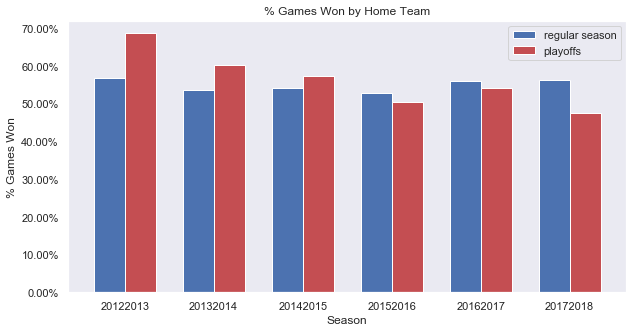

In [127]:
xbar_width = .35
y1 = home_pct_by_season['regular']
y2 = home_pct_by_season['playoffs']
xval= np.arange(len(home_pct_by_season))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('% Games Won by Home Team')
ax1.set_ylabel('% Games Won')
ax1.set_xlabel('Season')
ax1.set_xticks(xval)
ax1.set_xticklabels(home_pct_by_season.index)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

ax1.bar(xval-xbar_width/2,height=y1, width=bar_width,color='b',label='regular season')
ax1.bar(xval+xbar_width/2,height=y2,width=bar_width,color='r',label='playoffs')
ax1.legend()
ax1.grid(False)

pass


In [128]:
home_pct_by_month = reg_season.groupby(['season','month'])['side_won'].mean()
home_pct_by_month

season    month
20122013  1        0.604396
          2        0.502564
          3        0.602564
          4        0.575000
20132014  1        0.537037
          2        0.612500
          3        0.504386
          4        0.533333
          10       0.529101
          11       0.536946
          12       0.550239
20142015  1        0.571429
          2        0.500000
          3        0.497717
          4        0.590361
          10       0.530201
          11       0.541063
          12       0.593750
20152016  1        0.521978
          2        0.507772
          3        0.549550
          4        0.453333
          10       0.478261
          11       0.533679
          12       0.598039
20162017  1        0.547368
          2        0.502762
          3        0.567100
          4        0.556962
          10       0.653846
          11       0.592417
          12       0.519231
20172018  1        0.494318
          2        0.560976
          3        0.578723
    

In [12]:
#goals scored home vs. away
home_goals_pg = reg_season['home_goals'].sum() / reg_season['home_goals'].count()
away_goals_pg = reg_season['away_goals'].sum() / \
            reg_season['home_goals'].count()
differential_pg = home_goals_pg - away_goals_pg
print("Home goals scored: " + str(home_goals_pg) + "\nAway goals scored: " \
      + str(away_goals_pg) + "\nDifferential: " + str(differential_pg))

Home goals scored: 2.9154970337143684
Away goals scored: 2.6431775430473157
Differential: 0.27231949066705274


In [140]:
#goals for and against by team (home goals scored - away goals scored; home goals given up vs. away goals given up)
goals_for_by_team = pd.Series(reg_season.groupby(['home_team'])['home_goals'].mean() \
                              - reg_season.groupby(['away_team'])['away_goals'].mean())
goals_against_by_team = pd.Series(reg_season.groupby(['home_team'])['away_goals'].mean() \
                                  - reg_season.groupby(['away_team'])['home_goals'].mean())
goals_for_against = pd.DataFrame({'goals_for_diff':goals_for_by_team, 'goals_against_diff':goals_against_by_team, 
                                  'total':goals_for_by_team - goals_against_by_team})
goals_for_against = goals_for_against.sort_values(by='total',ascending=False)

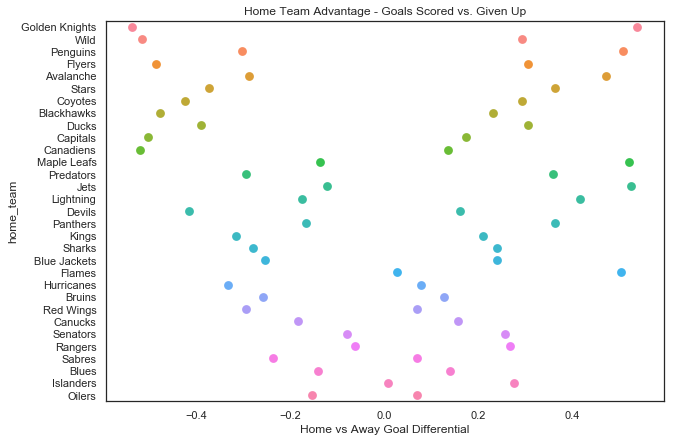

In [141]:
sns.set(style = 'white')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax = sns.pointplot(x=goals_for_against['goals_against_diff'], y=goals_for_against.index, hue = goals_for_against.index, join=False)
ax = sns.pointplot(x=goals_for_against['goals_for_diff'], y=goals_for_against.index, hue = goals_for_against.index, join=False)
ax.set(xlabel='Home vs Away Goal Differential', title = 'Home Team Advantage - Goals Scored vs. Given Up')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.get_legend().set_visible(False)
#fmt = '{x:,.2%}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.xaxis.set_major_formatter(tick)
pass

## Exploratory Analysis of Game Team Data

In [74]:
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
game_teams_stats = game_teams_stats.set_index('game_id')
#team_info = pd.read_csv('data/team_info.csv')
#team_info = team_info.set_index('team_id')
game_teams_stats.shape

(14882, 14)

In [75]:
game_teams_stats.isnull().sum()

team_id                   0
HoA                       0
won                       0
settled_in                0
head_coach                0
goals                     0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
dtype: int64

In [76]:
# join with game df to get regular season vs. playoffs, season and abbreviation
game_teams_stats = game_teams_stats.merge(game[['type', 'season']], on = 'game_id')
game_teams_stats = game_teams_stats.merge(team_info[['teamName']], on='team_id', right_index=True)
#get regular season only for ease
reg_season_stats = game_teams_stats[game_teams_stats['type']=='R']

game_teams_stats.head()

,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,type,season,teamName
game_id,,,,,,,,,,,,,,,,,
2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,P,20122013,Rangers
2012030222,3,away,False,REG,John Tortorella,2,37,33,11,5,0,51.7,1,4,P,20122013,Rangers
2012030223,3,home,False,REG,John Tortorella,1,24,37,2,2,0,38.2,7,9,P,20122013,Rangers
2012030224,3,home,True,OT,John Tortorella,4,32,40,8,4,1,46.3,9,7,P,20122013,Rangers
2012030225,3,away,False,REG,John Tortorella,1,29,25,13,2,1,50.9,5,3,P,20122013,Rangers


In [143]:
team_win_rate = reg_season_stats.groupby(['teamName','HoA'])['won'].mean()
team_win_df = team_win_rate.unstack()
team_win_df['diff'] = team_win_df['home'] - team_win_df['away']
#print(team_win_df)
team_win_series = team_win_df['diff'].sort_values(ascending=False)

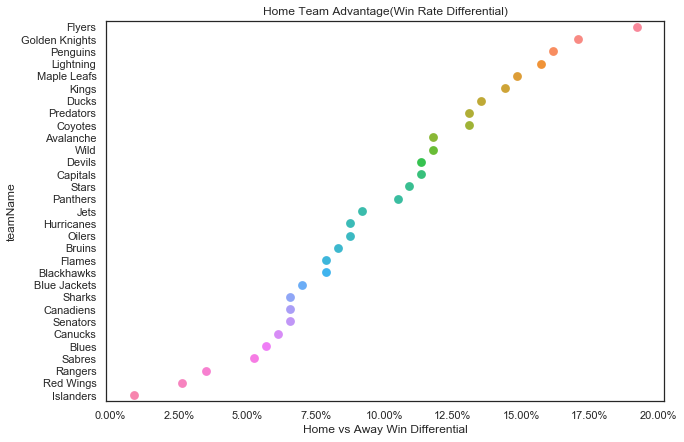

In [89]:
sns.set(style = 'white')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax = sns.pointplot(x=team_win_series, y=team_win_series.index, hue = team_win_series.index, join=False)
ax.set(xlabel='Home vs Away Win Differential', title = 'Home Team Advantage(Win Rate Differential)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.get_legend().set_visible(False)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
pass

In [94]:
def top_teams(num_teams):
    '''Returns list of top teams by number of wins. Parameter is number of teams returned'''
    seasons = {i:[] for i in game_teams_stats['season'].unique()}
    for i in seasons.keys():
        subdata = game_teams_stats[game_teams_stats.season == i]
        rankbyseason = subdata.won.groupby([subdata.teamName,]).sum().sort_values(ascending=False)
        seasons[i].extend(list(rankbyseason.index[:num_teams]))
    
    return seasons

In [95]:
def top_team_category(rankings, row):
    if row['teamName'] in rankings[row['season']]:
        return 'good'
    else:
        return 'bad'

In [96]:
rankings = top_teams(10)
game_teams_stats['classifier'] = game_teams_stats.apply(lambda row: top_team_category(rankings, row),axis = 1)

In [110]:
diff_by_season = game_teams_stats.groupby(['season','classifier','HoA'])['won'].agg('mean').unstack()
diff_by_season['diff'] = diff_by_season['home'] - diff_by_season['away']
diff_by_season['check'] = diff_by_season['home'] + diff_by_season['away']
#diff_by_season['diff'].sort_values(ascending = False)
diff_by_season.index.unique(level='season')

Int64Index([20122013, 20132014, 20142015, 20152016, 20162017, 20172018], dtype='int64', name='season')

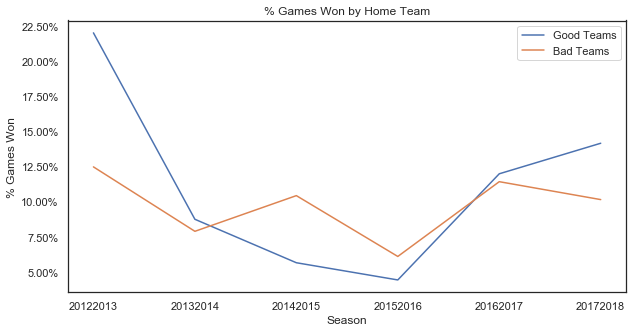

In [112]:
xbar_width = .35
y1 = pd.DataFrame(diff_by_season['diff'][:,'good'])
y2 = pd.DataFrame(diff_by_season['diff'][:,'bad'])
x = diff_by_season.index.unique(level='season')
xval= np.arange(len(x))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('% Games Won by Home Team')
ax1.set_ylabel('% Games Won')
ax1.set_xlabel('Season')
ax1.set_xticks(xval)
ax1.set_xticklabels(x)
fmt = '{x:,.2%}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax1.plot(xval,y1,label='Good Teams')
ax1.plot(xval,y2,label='Bad Teams')
#ax1.plot(xval-xbar_width/2,height=y1, width=bar_width,color='b',label='regular season')
#ax1.plot(xval+xbar_width/2,height=y2,width=bar_width,color='r',label='playoffs')
ax1.legend()
#ax1.grid(False)

pass